# Practical Application of Principal Component Analysis

## Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

## Applications of PCA :
- Data Visualisation
- Speeding up a Machine Learning algorithm

In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading the dataset
data = pd.read_csv("breast_cancer_dataset.csv")
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

#### so this dataset has 30 features and one label column

In [4]:
y = data['label'] 
y=y.values.reshape(569,1)
df = pd.DataFrame(y)
df.to_csv("labels.csv",index=0)

In [5]:
data['label'].replace(1, 'Benign',inplace=True)
data['label'].replace(0, 'Malignant',inplace=True)

In [6]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [7]:
#importing visualisation libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

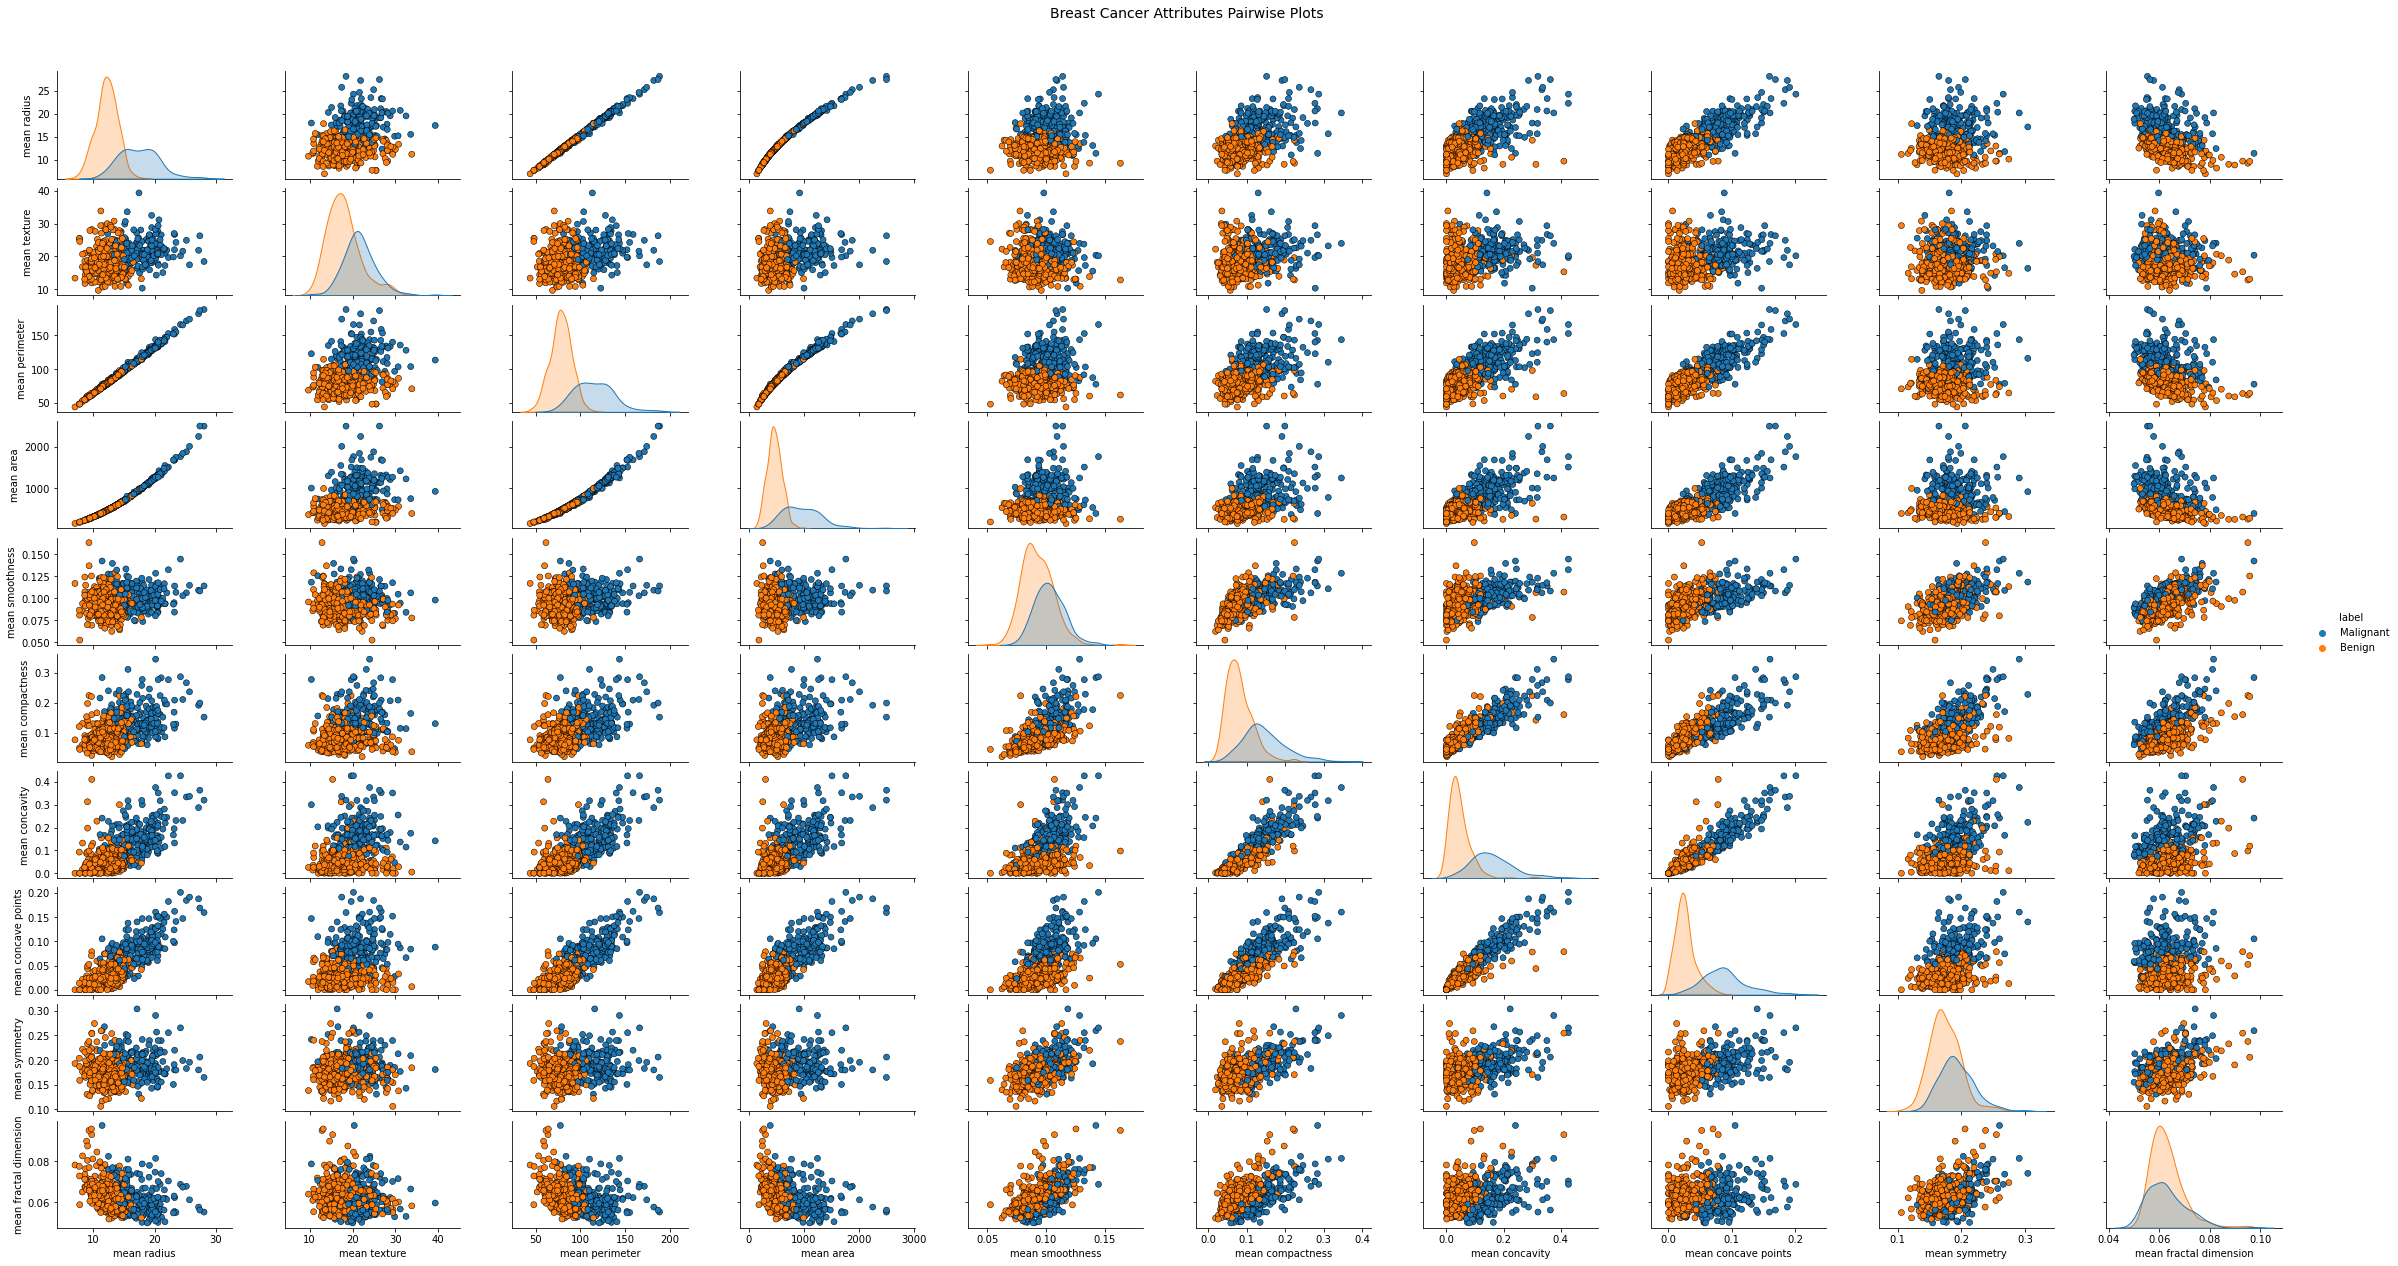

In [8]:
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension','label']
pp = sns.pairplot(data[cols],hue='label',height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Breast Cancer Attributes Pairwise Plots', fontsize=14)

Text(0.5, 0, 'Mean Texture')

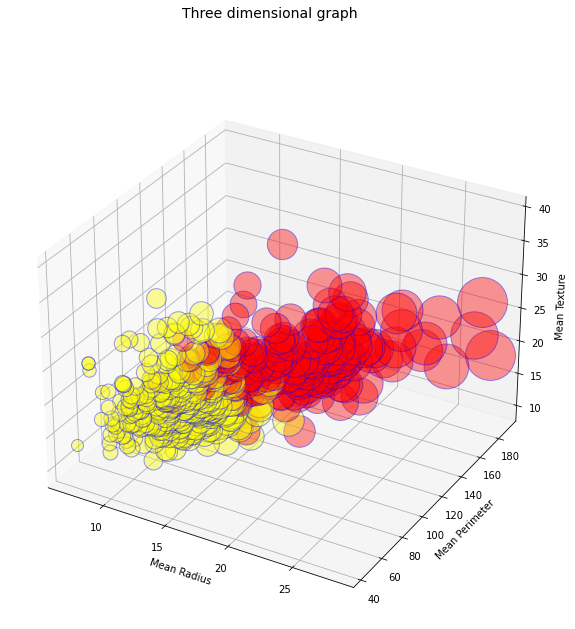

In [9]:

# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Three dimensional graph', fontsize=14)

xs = list(data['mean radius'])
ys = list(data['mean perimeter'])
zs = list(data['mean texture'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(data['mean area'])
colors = ['red' if wt == 'Malignant' else 'yellow' for wt in list(data['label'])]

for datax, color, size in zip(data_points, colors, ss):
    x, y, z = datax
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='b', s=size)

ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Perimeter')
ax.set_zlabel('Mean Texture')

# Using PCA to reduce the dimensionality and make Visualisation of multivariate data easy

We need to normalise the data before applying PCA because scale of different features can influence the output of PCA

In [10]:
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

from sklearn.preprocessing import StandardScaler
x = data.loc[:,features].values
x = StandardScaler().fit_transform(x)

In [11]:
np.mean(x),np.std(x) #mean 0 and std 1

(-6.826538293184326e-17, 1.0)

In [12]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_data= pd.DataFrame(x,columns=feat_cols)#converting data into dataframe
normalised_data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [13]:
normalised_data.to_csv("features.csv",index=False)

In [14]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2)
principalComponents_data = pca_data.fit_transform(x)
principalComponents_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [15]:
#converting PCA data into dataframe
pc_df = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2'])
pc_df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [16]:
print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


In [17]:
# to see which features are the most important
model = pca_data.fit(x)
X_pc = model.transform(x)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]


# get the names
most_important_names = [features[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [18]:
df

,0,1
0,PC0,mean concave points
1,PC1,mean fractal dimension


<Figure size 432x288 with 0 Axes>

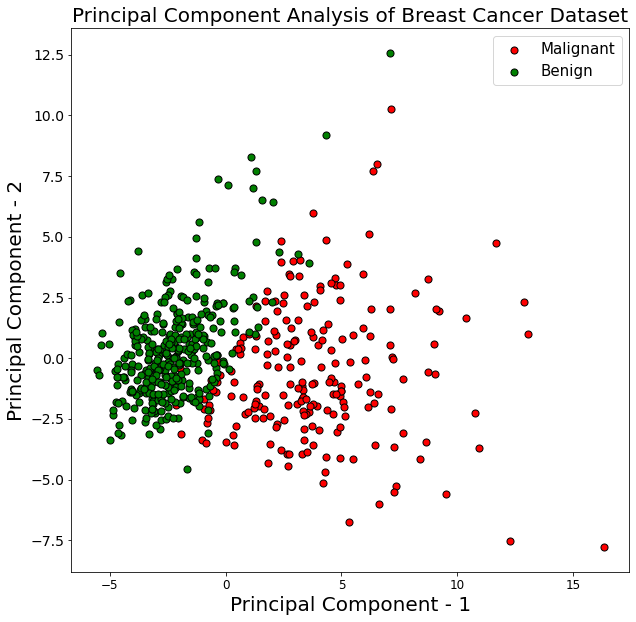

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Malignant', 'Benign']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = data['label'] == target
    plt.scatter(pc_df.loc[indicesToKeep, 'principal component 1']
               , pc_df.loc[indicesToKeep, 'principal component 2'], c = color,edgecolors='k',s = 50)

plt.legend(targets,prop={'size': 15})

In [20]:
from sklearn.decomposition import PCA
pca_data1 = PCA(0.95)
principalComponents_data1 = pca_data1.fit_transform(x)

#converting PCA data into dataframe
pc_df1 = pd.DataFrame(data = principalComponents_data1)
pc_df1.head()

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


In [21]:
print('Explained variation per principal component: {}'.format(pca_data1.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


In [22]:

model = pca_data1.fit(x)
X_pc = model.transform(x)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]


# get the names
most_important_names = [features[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df1 = pd.DataFrame(dic.items())

In [23]:
df1

,0,1
0,PC0,mean concave points
1,PC1,mean fractal dimension
2,PC2,texture error
3,PC3,worst texture
4,PC4,mean smoothness
5,PC5,worst symmetry
6,PC6,worst fractal dimension
7,PC7,smoothness error
8,PC8,concavity error
9,PC9,mean symmetry
